# Circles on circles

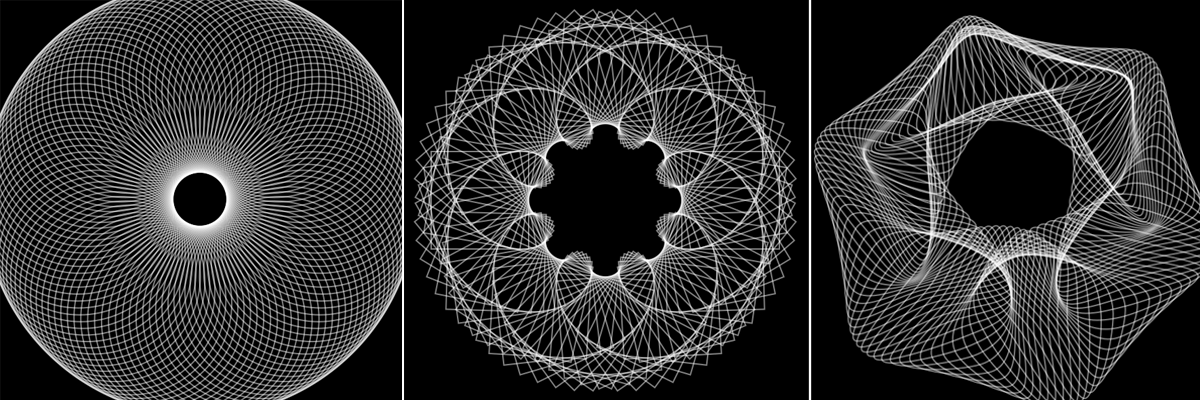

This is a hybrid lab assignment. You will be able to test the code here in a notebook, and then this will give you instructions on how to move the code to an interactive sketch. Let's start by importing py5canvas 

In [1]:
from py5canvas import *

Now we will create a canvas and use `direction` to get points along a circle centered on the canvas.

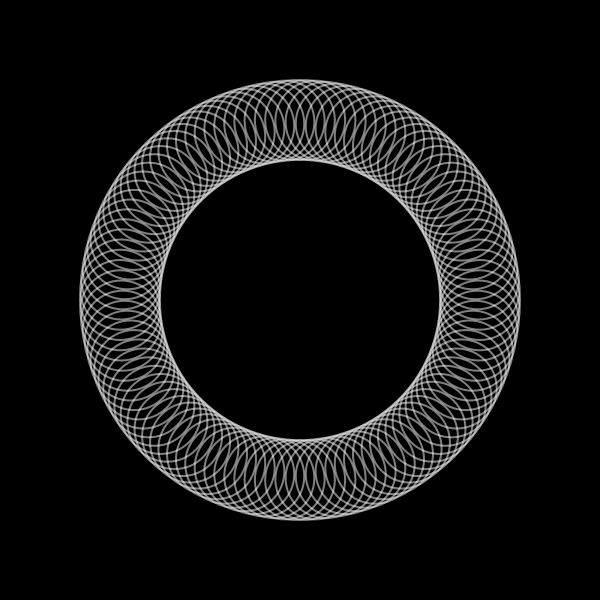

In [33]:
create_canvas(600, 600)
background(0)
no_fill()
stroke(255, 128)
translate(center)
rect_mode('center')

num_circles = 110
layout_radius = width*0.3
circle_radius = 40

for angle in linspace(0, TWO_PI, num_circles, False):
    pos = direction(angle)*layout_radius
    circle(pos, circle_radius)

show()

Look at the code and try to understand it. The loop uses `linspace` to get a sequence of points going from `0` to `2*PI`, but skips the last angle by setting the last parameter to `False`. Not doing so would create two circles corresponding to the angle `0` and the angle `2*PI` (like 0 and 360 degrees).

The `direction` function gives us a vector with length one (often referred to as a "unit vector") pointing in the direction given by the angle. To get a point on the circle we just multiply this vector by the desired radius (`layout_radius`) and it becomes of the same length as the specified radius. Try to play with the number of circles and the values of both `layout_radius` and `circle_radius` to see how this works. 

In the cell below you can also try to see the output of different values of an angle and radius. You can try to put `radians(45)` or the same function with another angle in degrees instead of a number when you call the `direction` function to specify an angle in degrees. The function `radians(angle)` converts an angle specified in degrees to radians

[28.66009467  8.8656062 ]


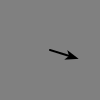

In [38]:
radius = width*0.3
v = direction(0.3)*radius
print(v)

create_canvas(100, 100)
translate(center)

arrow((0, 0), v)
show()

Now keep on experimenting with the code above. As an example, you could replace the `circle` drawing function with this code with `square(center, circle_radius)`. 
Because we specified `rect_mode('center')` earlier on in the code, rectangles and squares will be drawn from the center and not from the top left corner. 

You could also try to add transformations with pairs of `push()` and `pop()` (this will work the same as pairs of `push_matrix()` and `pop_matrix()`). A fun example can be replacing the circle drawing code with:
```python
push()
translate(pos)
rotate(angle*3)
square((0, 0), circle_radius)
pop()
```

Try experimenting with the radii and the number that multiplies the angle. Note that we specify the center of the square with `(0, 0)`. This is a [tuple](https://www.w3schools.com/python/python_tuples.asp) containing the X and Y coordinates of a point. It is not a vector but Py5canvas will accept this syntax and understand that you are grouping two coordinates instead of passing them one at the time.


## Customizing the circles 

In the example above we have drawn multiple circles or other predefined shapes, but let's try to do something more sophisticated by creating a function that draws a polygon or curve that passes through points defined along another circle:

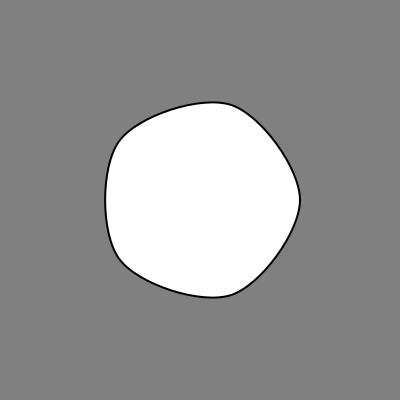

In [21]:
def draw_circle_on_circle(layout_angle, pos, radius):
    begin_shape()
    for angle in linspace(0, TWO_PI, 5, False):
        r = radius         
        p = direction(angle)*r + pos
        curve_vertex(p)
    end_shape(CLOSE)

### Preview
create_canvas(400, 400)
draw_circle_on_circle(0, center, 100)
show()
################

The code is similar to what we did earlier with placing shapes, but this time we do not use translate but add `pos` to the vector that created a point along a circle. We also put `begin_shape` and `end_shape` around the loop and `vertex` inside, so the code will draw one shape instead of many.

Try replacing `vertex` with `curve_vertex`. It will create a smooth shape instead of a polygon. Also, if you look at the class notebook, at the end it shows a trick on how to modify the "tightness" of the curve. 

You can use the code above to experiment with different shapes. We defined a function that accepts an initial parameter `layout_angle` that we are not using yet. We will use it soon to modify the shape based on an angle we pass to it, but for now it is just set to zero.

Now to put things together:

- copy the code from the previous code cell into the next code cell
- then replace the part of code following `### Preview` with the code of the first example in this notebook.
- Replace the call to circle with:
  - `draw_circle_on_circle(angle, pos, circle_radius)`

Do this in the code cell below

Try experimenting with the number of vertices, by changing the value before `True` inside `linspace`, and try to see how changing the this number as well as switching between `curve_vertex` and `vertex` affects the output pattern.

## Variations based on the angle
We have not used the `layout_angle` argument of the function yet but we can use that to vary the radius of the "circles" we draw in `draw_circle_on_circle`. You can try this:

```
r = remap(sin(angle*3 + layout_angle*2), -1, 1, radius*0.5, radius)
```

This code is a bit cryptic but it uses the angle in the loop together with the angle of the "outer circle" we passed into the function to create a sine wave.  The `layout_angle` variable acts as a ["phase"](https://en.wikipedia.org/wiki/Phase_(waves)), meaning that it shifts the wave depending on the value. We did not cover this in depth yet, but hopefully we will in the next session. 

## Making it interactive
To make this sketch interactive, create an empty sketch (.py extension) with this code 

```python
from py5canvas import *

def setup():
    create_canvas(600, 600)

def draw():
    background(0)

def key_pressed(key):
    if key == ' ':
        save('circles.svg')
        
run()
```

Then replace `background(0)` inside `draw` with any of the code that shows an image you like in the cells you completed above. When you copy the code, make sure you remove from inside `draw` any call to `create_canvas` (leaving the one in `setup`) and `show()`. 

The code above has the option to save a SVG file (easy to send to the plotter) when you press the space bar. 
You can save directly from a notebook by simply writing the same in a cell, e.g. this will save the current canvas to a svg file:

In [34]:
save('circles.svg')